In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mylesoneill_world_university_rankings_path = kagglehub.dataset_download('mylesoneill/world-university-rankings')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt

#plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv


In [ ]:
df=pd.read_csv('/kaggle/input/world-university-rankings/timesData.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

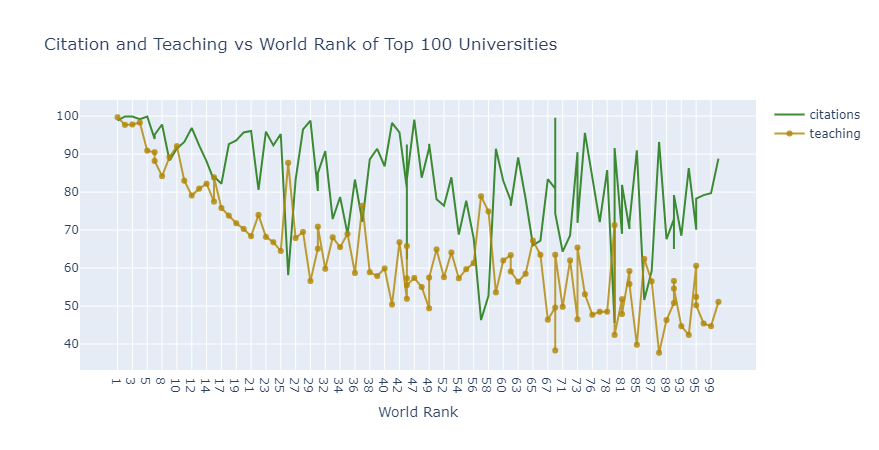

In [ ]:
#LineCharts--Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities
data=df.iloc[:100,:].copy()

trace1=go.Scatter(""
                x=data.world_rank,
                y=data.citations,
                mode='lines',
                name='citations',
                marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                text=data.university_name)

trace2=go.Scatter(
                x=data.world_rank,
                y=data.teaching,
                mode='lines+markers',
                name='teaching',
                marker = dict(color = 'rgba(176, 134, 2, 0.8)'),
                text=data.university_name)

data1=[trace1,trace2]
layout=dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
             )
fig=dict(data=data1,layout=layout)
iplot(fig)




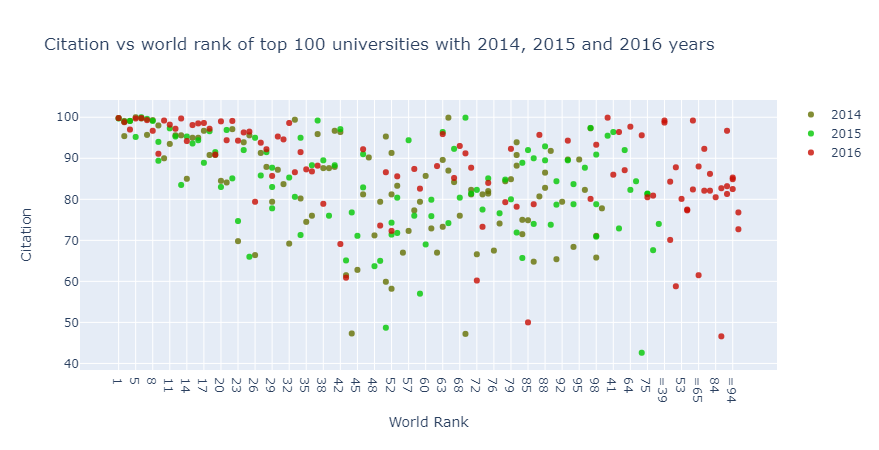

In [ ]:
#ScatterPlot-- Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years

data2=df[df['year']==2014].iloc[:100,:].copy()
data4=df[df['year']==2015].iloc[:100,:].copy()
data6=df[df['year']==2016].iloc[:100,:].copy()

trace1=go.Scatter(
                x=data2.world_rank,
                y=data2.citations,
                mode='markers',
                name='2014',
                marker = dict(color = 'rgba(100, 112,2, 0.8)'),
                text=data2.university_name)

trace2=go.Scatter(
                x=data4.world_rank,
                y=data4.citations,
                mode='markers',
                name='2015',
                marker = dict(color = 'rgba(1, 200, 2, 0.8)'),
                text=data4.university_name)
trace3=go.Scatter(
                x=data6.world_rank,
                y=data6.citations,
                mode='markers',
                name='2016',
                marker = dict(color = 'rgba(200, 13, 2, 0.8)'),
                text=data6.university_name)

data=[trace1,trace2,trace3]
layout=dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False),
             )
fig=dict(data=data,layout=layout)
iplot(fig)

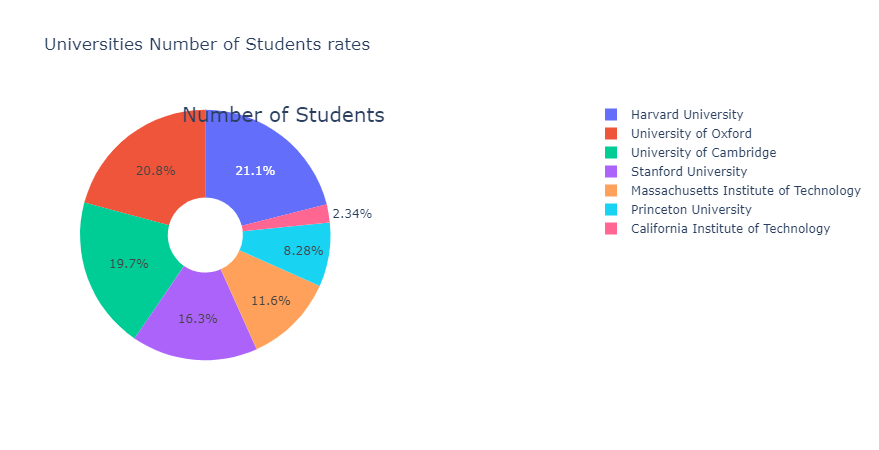

In [ ]:
#PiePlot--Students rate of top 7 universities in 2016

data=df[df['year']==2016].iloc[:7,:]
#data['num_students']=data['num_students'].astype('float')
rate_stu=[float(i.replace(',','.')) for i in data['num_students']]

labels = data.university_name
# figure
fig = {
  "data": [
    {
      "values": rate_stu,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
      "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

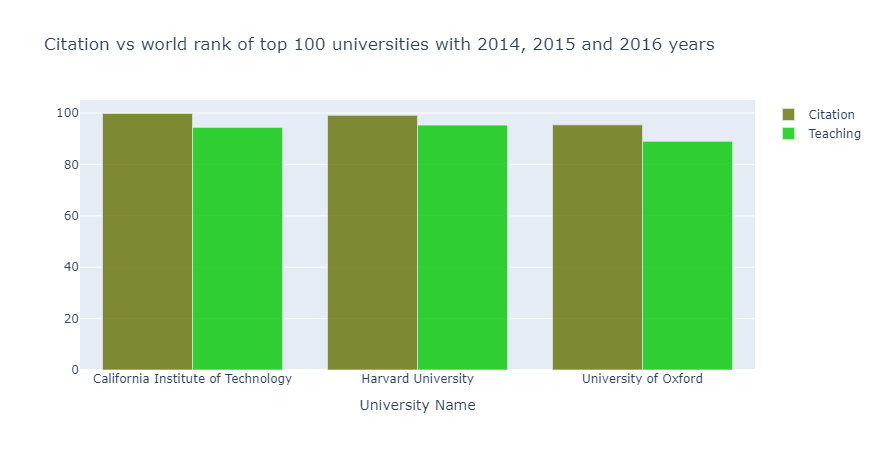

In [ ]:
#BarCharts(BAR PLOT)
data=df[df['year']==2014].iloc[:3,:]
trace1=go.Bar(
                x=data.university_name,
                y=data.citations,
                name='Citation',
                marker = dict(color = 'rgba(100, 112,2, 0.8)'),
                text=data.country)

trace2=go.Bar(
                x=data.university_name,
                y=data.teaching,
                name='Teaching',
                marker = dict(color = 'rgba(1, 200, 2, 0.8)'),
                text=data.country)

data1=[trace1,trace2]
layout=dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'University Name',ticklen= 5,zeroline= False),
             )
fig=dict(data=data1,layout=layout)
iplot(fig)

In [ ]:
#teaching=df['teaching'].replace(',','.')

data.loc[data['international']==data['international'].max()]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,18.178,14.7,37%,31 : 69,2016


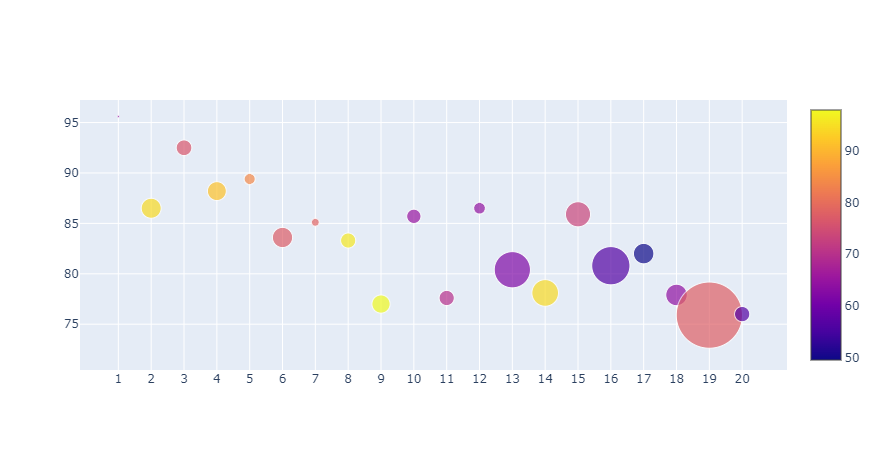

In [ ]:
#BUBBLECAHARTS--University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016
data=df[df['year']==2016].iloc[:20,:]
data['international']=data['international'].astype('float')
data['num_students']=[float(i.replace(',','.')) for i in data['num_students']]
data1 = [
    {
        'y': data.teaching,
        'x': data.world_rank,
        'mode': 'markers',
        'marker': {
            'color': data.international,
            'size': data.num_students,
            'showscale': True
        },
        "text" :  data.university_name
    }
]
iplot(data1)


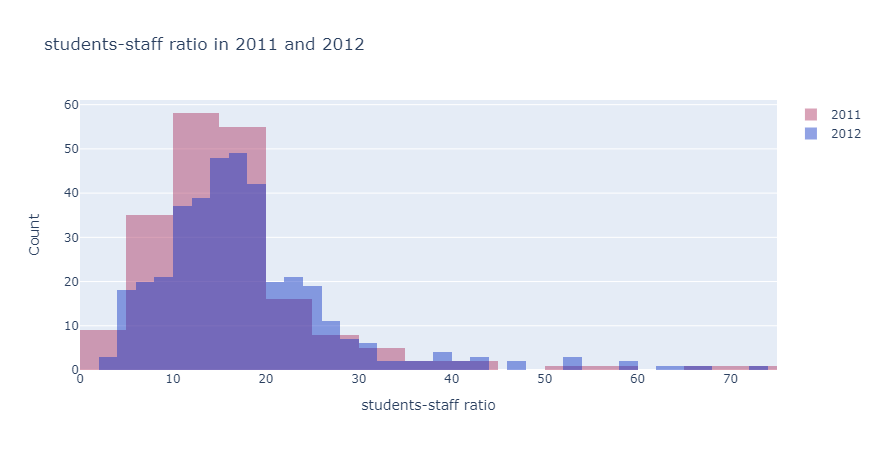

In [ ]:
#HISTOGRAM--Lets look at histogram of students-staff ratio in 2011 and 2012 years.
data=df[df['year']==2011]
data1=df[df['year']==2012]

trace1 = go.Histogram(
    x=data['student_staff_ratio'],
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=data1['student_staff_ratio'],
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data2 = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data2, layout=layout)
iplot(fig)


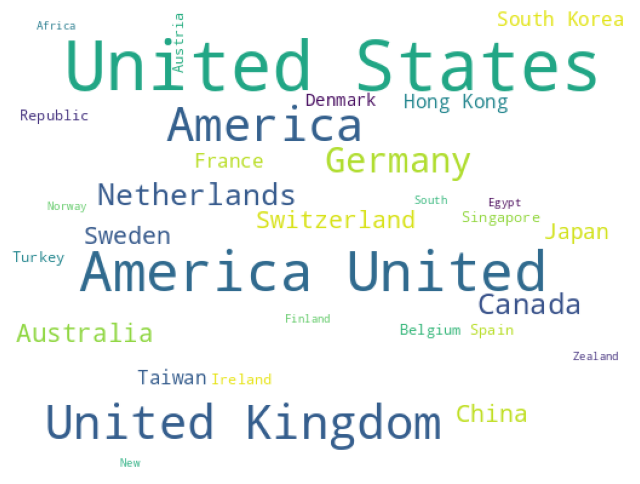

In [ ]:
#WORDCLOUD-- Lets look at which country is mentioned most in 2011.

data=df[df['year']==2011]['country']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(data))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

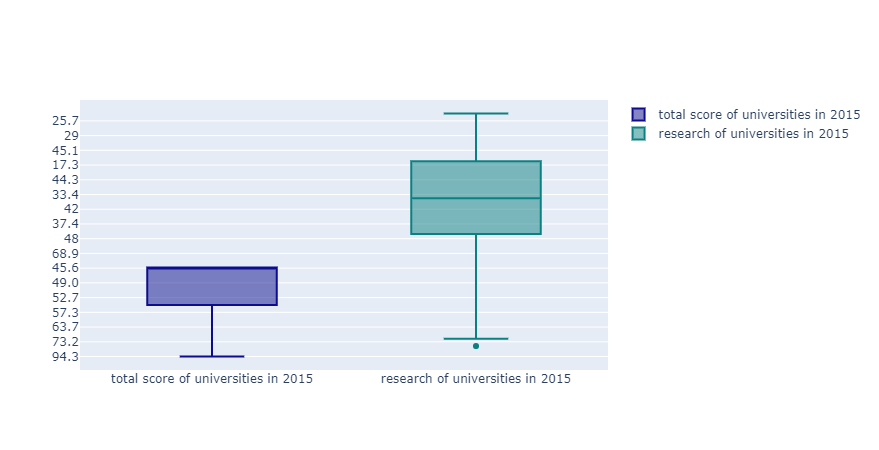

In [ ]:
#BOXPLOT

data=df[df['year']==2015]

trace0 = go.Box(
    y=data.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=data.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data1 = [trace0, trace1]
iplot(data1)

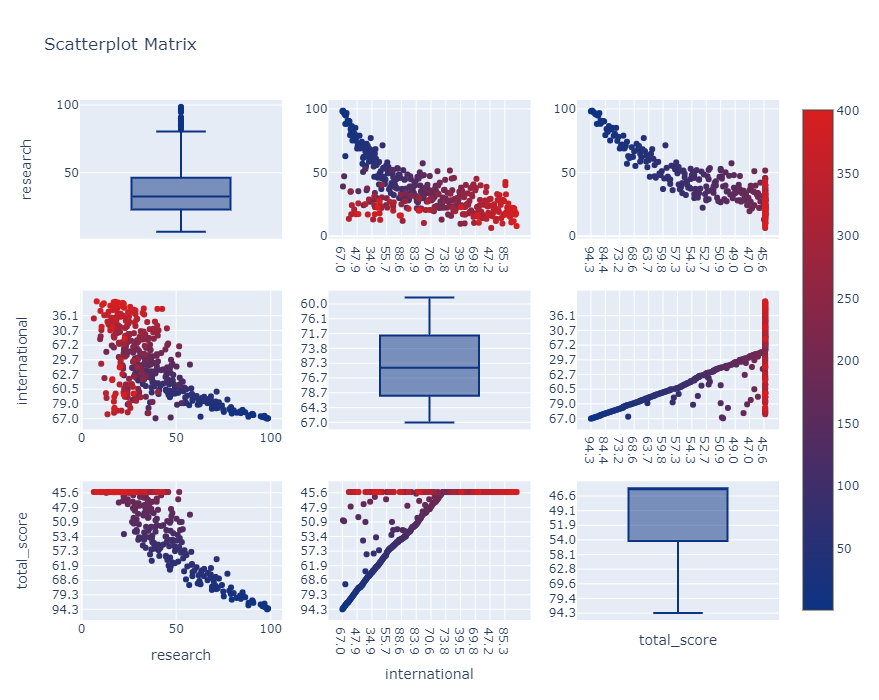

In [ ]:
#SCATTERPLOTMATRİX

import plotly.figure_factory as ff

dataframe = df[df.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
new_index=np.array(range(1,len(dataframe)+1))
data2015['index']=new_index

fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

/tmp/ipykernel_32/3989227248.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/3989227248.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



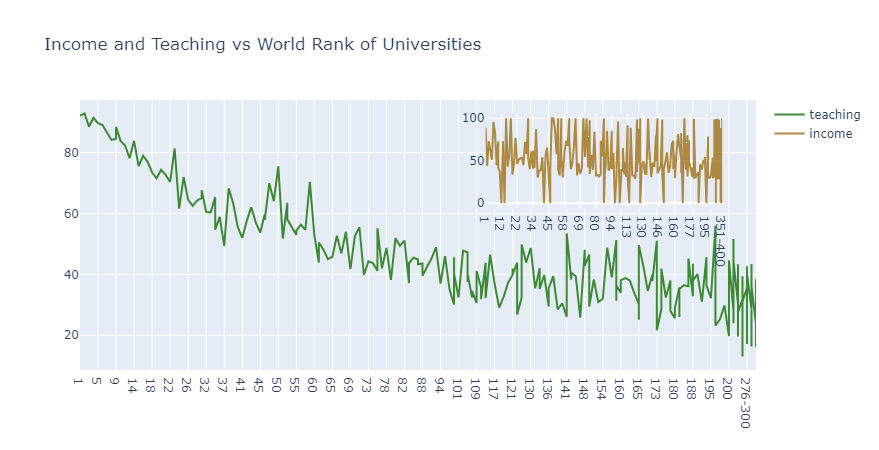

In [ ]:
#INSETPLOTS
dataframe = df[df.year == 2015]
dataframe['income']=dataframe['income'].replace('-',0.0)
dataframe['income']=dataframe['income'].astype('float')

dataframe['income'].value_counts()
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

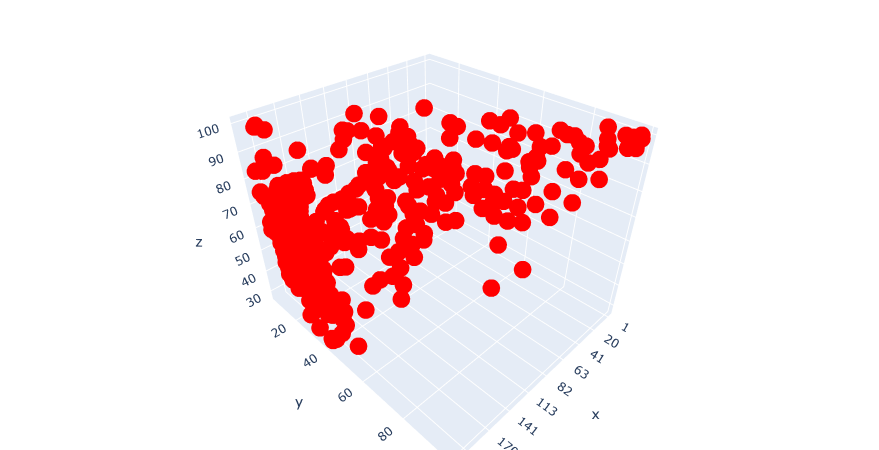

In [ ]:
#3DSCATTERPLOT

trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values
    )
)

data = [trace1]
layout = go.Layout(
      margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )

)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

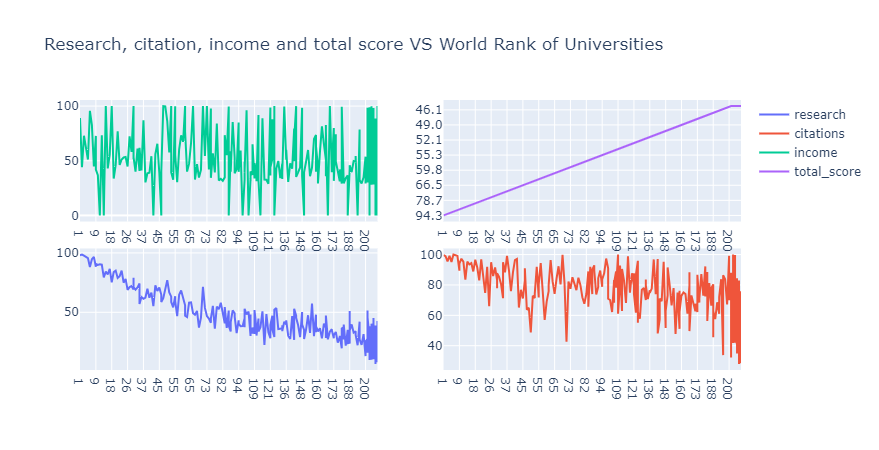

In [ ]:
#MULTİPLESUBPLOTS
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1],
        anchor='x3'
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data =[ [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
  )],
    [dict(
     type='scattergeo',
    lon = aerial['Target Longitude'],
    lat = aerial['Target Latitude'],
    hoverinfo = 'text',
    text = "Arrivel Country: " + aerial['Target Country'] + " Arrival City: "+aerial["Target City"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "red"),
        color = aerial["color"],
        opacity = 0.7),

)]]
road_route=[dict(


)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
import numpy as np

new_li=np.array([37.131022,14.321464])
target=np.array([38.22,15.37])
li1=target-new_li
li1


array([1.088978, 1.048536])

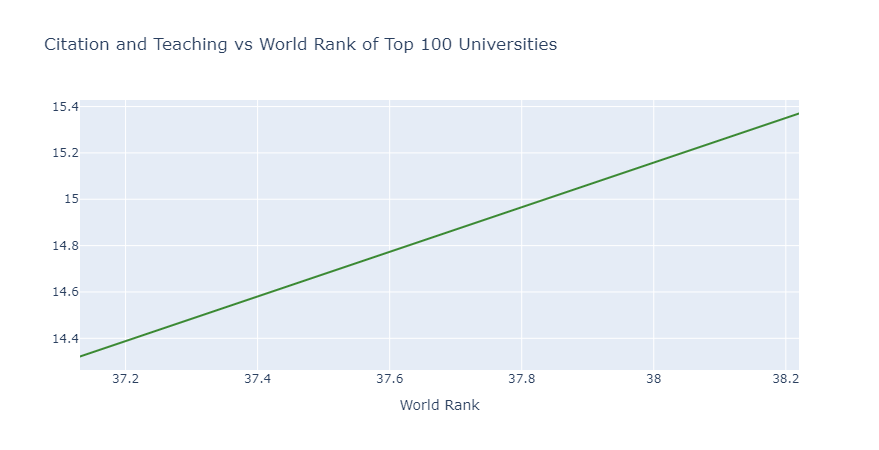

In [ ]:
#LineCharts--Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities
import numpy as np

la=np.array([37.131022,38.22])
target=np.array([14.321464,15.37])
li1=target-new_li


trace1=go.Scatter(
                x=la,
                y=target,
                mode='lines',
                name='citations',
                marker = dict(color = 'rgba(16, 112, 2, 0.8)'))



data1=[trace1]
layout=dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
             )
fig=dict(data=data1,layout=layout)
iplot(fig)


